In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv(r"C:\Users\dhruv\Downloads\continuous.csv")



In [7]:
df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,333,61,0,31.160,0,0,1,13429.03540
1,356,46,1,27.600,0,0,3,24603.04837
2,139,54,0,31.900,3,0,2,27322.73386
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560


In [47]:
df.shape

(936, 8)

# Checking Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x26d97ebda48>,
 'caps': [<matplotlib.lines.Line2D at 0x26d97ebdb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d97ebd208>],
 'medians': [<matplotlib.lines.Line2D at 0x26d97ec2f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d97ec2c08>],
 'means': []}

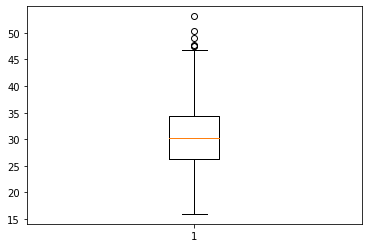

In [12]:
plt.boxplot(df["bmi"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26d97f2ec08>,
 'caps': [<matplotlib.lines.Line2D at 0x26d97f2ed48>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d97f2e348>],
 'medians': [<matplotlib.lines.Line2D at 0x26d97f33d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d97f33dc8>],
 'means': []}

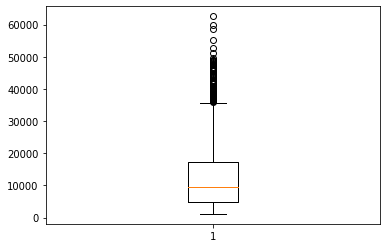

In [13]:
plt.boxplot(df["charges"])

# Removing the outliers

In [14]:
df[df['charges']>48000]

,id,age,sex,bmi,children,smoker,region,charges
44,40,60,1,39.900,0,1,3,48173.36100
109,1063,59,1,41.140,1,1,2,48970.24760
161,1147,60,1,32.800,0,1,3,52590.82939
245,282,54,1,40.565,3,1,0,48549.17835
335,531,57,1,42.130,1,1,2,48675.51770
437,1231,52,1,34.485,3,1,1,60021.39897
520,1242,64,1,36.960,2,1,2,49577.66240
588,820,33,0,35.530,0,1,1,55135.40209
718,1301,45,1,30.360,0,1,2,62592.87309
739,489,44,0,38.060,0,1,2,48885.13561


In [37]:
df.drop([161,437,588,718,794,879,109,44,245,335,520,739,926], inplace = True)
df[df['charges']>48000]

,id,age,sex,bmi,children,smoker,region,charges


In [38]:
df.drop([62,445,570], inplace = True)
df[df['bmi']>48]

,id,age,sex,bmi,children,smoker,region,charges


# Finding out correlation using heatmap

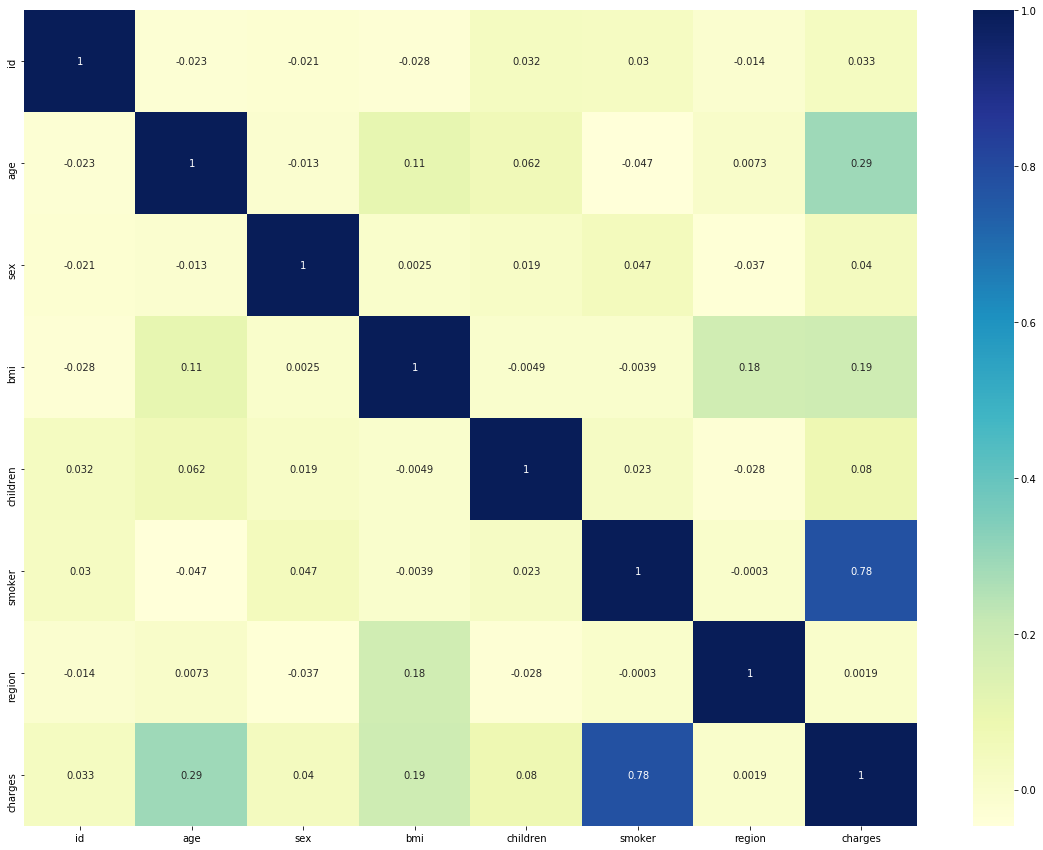

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

# Using statsmodels and considering all features

In [39]:
model01 = smf.ols("charges~age+sex+bmi+children+smoker+region", data=df).fit()

In [40]:
model01.params

Intercept   -11390.280110
age            251.977579
sex             74.062902
bmi            324.914525
children       459.859403
smoker       22456.258508
region        -313.819558
dtype: float64

In [41]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     418.5
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          4.84e-258
Time:                        13:02:58   Log-Likelihood:                -9279.3
No. Observations:                 920   AIC:                         1.857e+04
Df Residuals:                     913   BIC:                         1.861e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.139e+04   1146.267     -9.937      0.000   -1.36e+04   -9140.656
age          251.9776     13.802     18.256      0.000     224.889     279.066
sex           74.0629    385.439      0.192      0.848    -682.387     830.513
bmi          324.9145     33.543      9.687      0.000     259.085     390.744
children     459.8594    158.673      2.898      0.004     148.453     771.266
smoker      2.246e+04    484.565     46.343      0.000    2.15e+04    2.34e+04
region      -313.8196    175.689     -1.786      0.074    -658.620      30.981
==============================================================================
Omnibus:                      210.471   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.202
Skew:                           1.284   Prob(JB):                     7.01e-96
Kurtosis:                       5.200   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking the influence plots

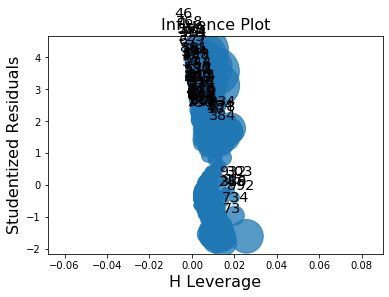

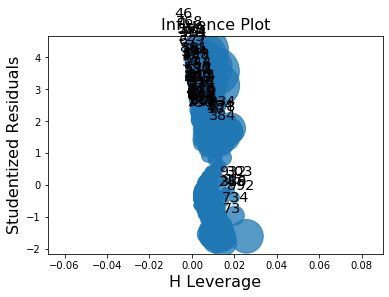

In [42]:
sm.graphics.influence_plot(model01)

## No outliers so no need to remove more points

# Checking skewness of the charges column

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score

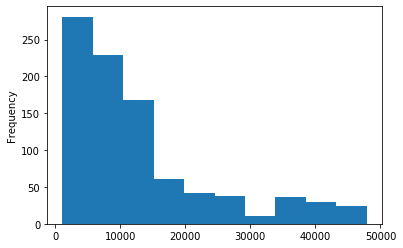

In [103]:
df["charges"].plot.hist()

In [105]:
#Adding a column of log_charges to the data

df["log_charges"]=np.log10(df["charges"])
df["log_charges"].skew()

-0.1569129222221872

In [107]:
df.head()

,id,age,sex,bmi,children,smoker,region,charges,log_charges
0,333,61,0,31.160,0,0,1,13429.03540,4.128045
1,356,46,1,27.600,0,0,3,24603.04837,4.390989
2,139,54,0,31.900,3,0,2,27322.73386,4.436524
3,382,55,1,30.685,0,1,0,42303.69215,4.626378
4,293,25,1,45.540,2,1,2,42112.23560,4.624408


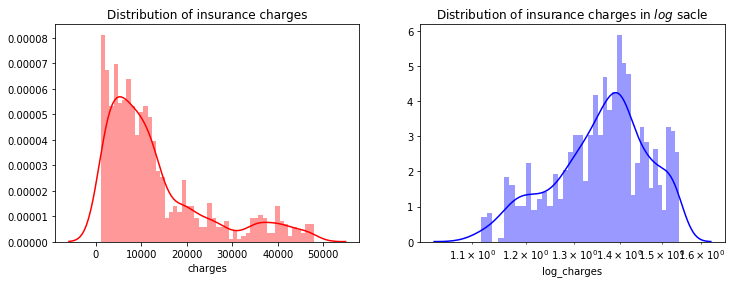

In [106]:
#W ecan see by log transform the data gets normally distributed
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log(df['log_charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

# LINEAR REGRESSION

In [108]:
#smoker has high relationship with charges so lets try linear regression with that
x,y =  df[["smoker"]], df['log_charges']


In [109]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.09, random_state = 1)

In [110]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
predlr = model.predict(x_test)

In [112]:
result_slr= r2_score(y_test, predlr)
print('Accuracy of first model : ' ,round(r2_score(y_test, predlr)*100,2))

Accuracy of first model :  40.2


# MULTIVARIATE LINEAR REGRESSION

In [113]:
x,y =  df[['bmi', 'age','region',
       'smoker', 'children']], df['log_charges']

In [114]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

In [115]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
predictions = model.predict(x_test)

In [117]:
result_mlr=r2_score(y_test, predictions)

In [118]:
print('Accuracy of first model : ' ,round(r2_score(y_test, predictions)*100,2))

Accuracy of first model :  75.64


# Trying out Polynomial Regression

In [119]:
X = df[['age', 'children', 'smoker', 'bmi', 'sex', 'region']]
y=df['log_charges']

In [120]:
x1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [121]:
model = LinearRegression().fit(x1, y)

In [122]:
fin = model.score(x1,y)
fin

0.8272946766035519

# Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [124]:
rf_pred = regressor.predict(x_test)
result_rf=r2_score(y_test,rf_pred)
result_rf

0.8129797334473963

# ADABOOST Regressor

In [125]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [126]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [128]:

search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000, 'random_state': 1}

In [129]:
ada2=AdaBoostRegressor(n_estimators=500,learning_rate=0.001,random_state=1)

In [130]:
ada2.fit(x_train,y_train)
ab_pred=ada2.predict(x_test)
result_ab=r2_score(y_test,ab_pred)
result_ab

0.7806238321370267

# Gradient boosting Regressor

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
#these parameters have been taken with the help of net
gbr_mod=GradientBoostingRegressor(n_estimators=3,max_depth=3,learning_rate=1,criterion='mse')
gbr_mod.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [133]:
gb_pred=gbr_mod.predict(x_test)
result_gb=r2_score(y_test,gb_pred)
result_gb

0.8005038444324302

# Comparing all models

In [134]:
models=pd.DataFrame({
"Model name": ["Simple LR","Mulitple LR","Polynomial","Random Forest","Ada Boost","Gradient Boost"],
"Final Scores": [result_slr,result_mlr,fin,result_rf,result_ab,result_gb]
})

In [135]:
models

,Model name,Final Scores
0,Simple LR,0.401964
1,Mulitple LR,0.756388
2,Polynomial,0.827295
3,Random Forest,0.812980
4,Ada Boost,0.780624
5,Gradient Boost,0.800504


# Polynomial Regression is the best model